In [1]:
import pandas as pd

# Load the Excel file
file_path = '../data/luiss_data_anonym.xlsx' # Update this path
df = pd.read_excel(file_path)

In [2]:
# First of all, delete all rows for which IvaM is missing, because we need to predict this:
df = df[~df.IvaM.isna()]

# Calculate number of NaNs per column
nans_per_column = df.isnull().sum()

# Calculate percentage of NaNs per column
percentage_nans_per_column = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for a cleaner display
nans_df = pd.DataFrame({'Number of NaNs': nans_per_column, 'Percentage of NaNs': percentage_nans_per_column})

print(nans_df)

                 Number of NaNs  Percentage of NaNs
Unnamed: 0                    0            0.000000
A                             0            0.000000
Ateco                         0            0.000000
B                            54            0.040309
C                        125230           93.478942
DataDoc                       0            0.000000
D                             1            0.000746
E                        132175           98.663094
F                        132175           98.663094
G                        133948           99.986564
H                        133948           99.986564
Tdoc                          0            0.000000
VA                            0            0.000000
CE                       131878           98.441396
DescrizioneRiga             905            0.675545
Importo                       0            0.000000
Iva                           0            0.000000
Conto                         0            0.000000
ContoStd    

**We now can identify three groups of columns:**

1. Columns with no missing values
2. Columns with a small percentage of missing values (<5%)
3. Columns with a large percentage of missing values (>50%)

_Note no cases between 2. and 3._

Before deleting rows or columns we have to ask two questions:

- does the presence of a values in a column with many NaNs provide a lot of predictive power? This way we could use empty values
- is the column with few NaNs valuable enough to apply a data imputation technique?

This should be determined per column:

- ...


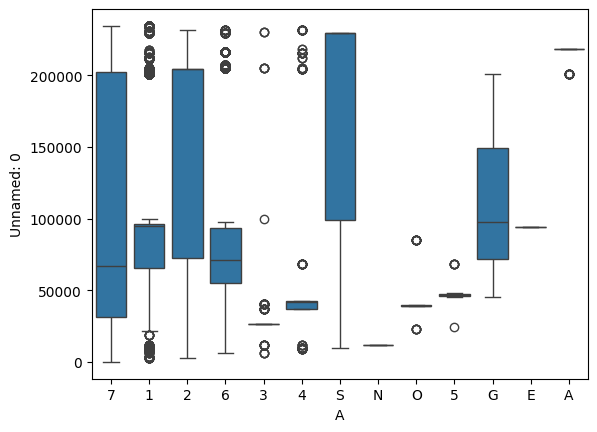

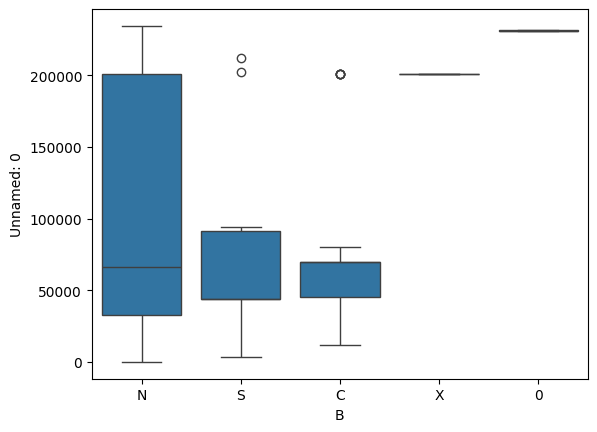

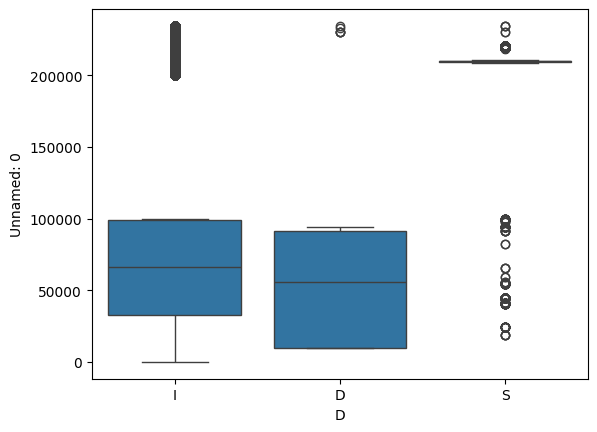

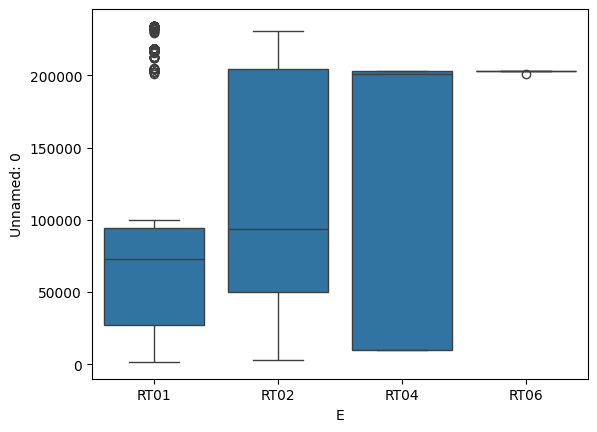

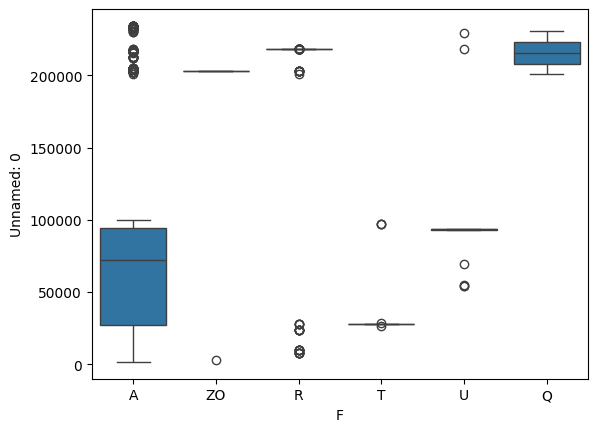

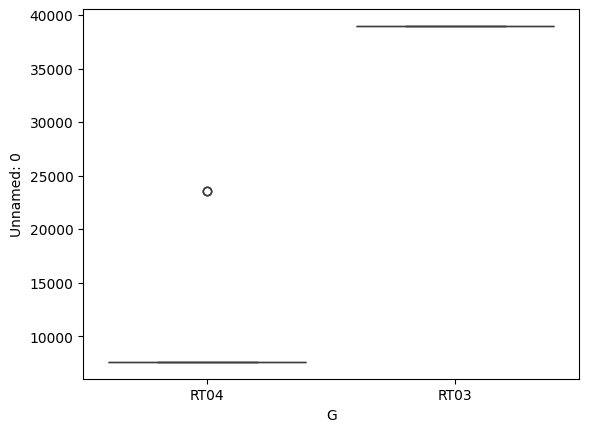

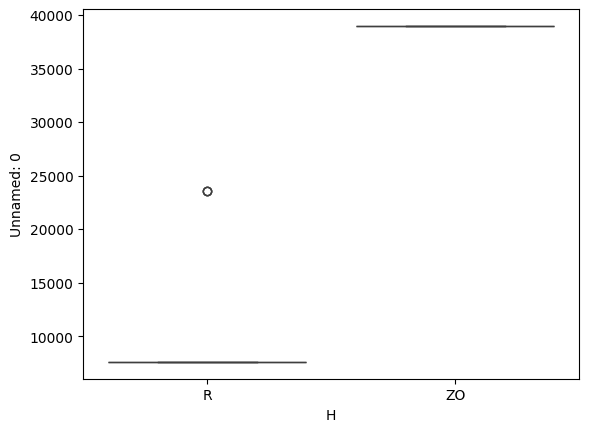

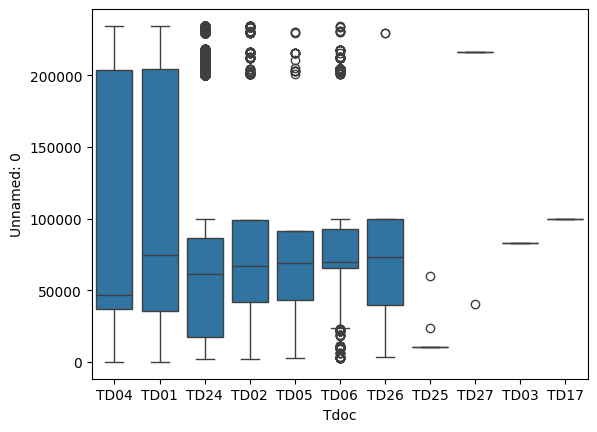

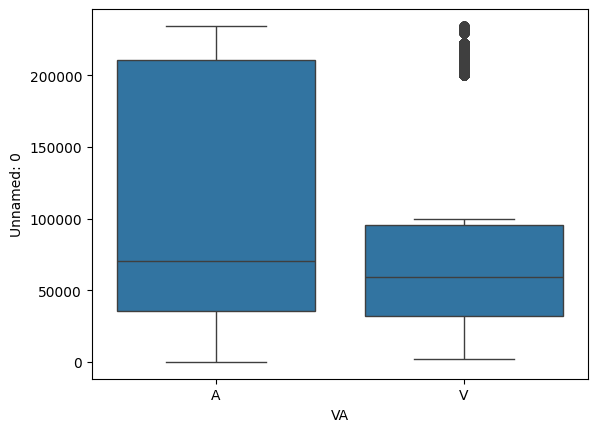

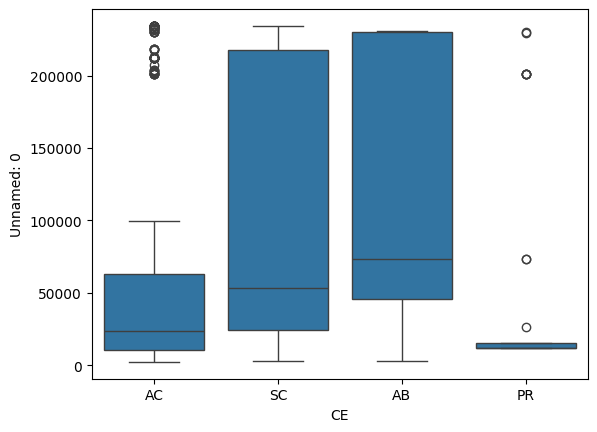

ValueError: 
SUPP 3 MOD CON VITI $$
                    ^
ParseException: Expected end of text, found '$'  (at char 20), (line:1, col:21)

<Figure size 640x480 with 1 Axes>

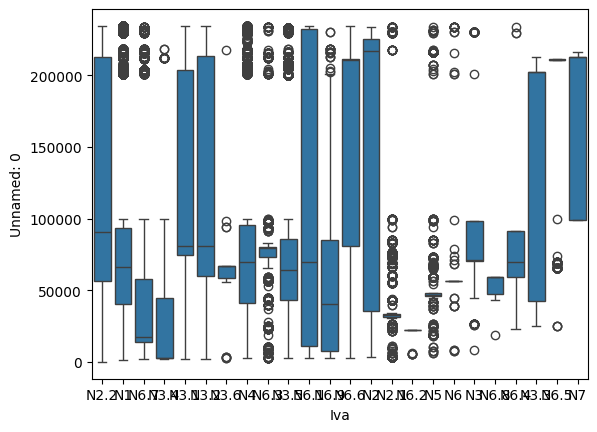

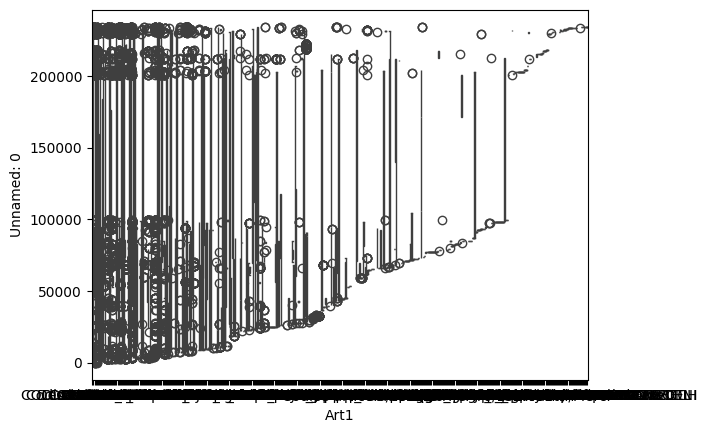

KeyboardInterrupt: 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Function to plot for Numerical vs. Numerical
def plot_numerical_vs_numerical(col1, col2):
    sns.scatterplot(x=col1, y=col2, data=df)
    plt.show()

# Function to plot for Numerical vs. Categorical
def plot_numerical_vs_categorical(num_col, cat_col):
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.show()

# Function to plot for Categorical vs. Categorical
def plot_categorical_vs_categorical(cat_col1, cat_col2):
    ct = pd.crosstab(df[cat_col1], df[cat_col2])
    ct.plot(kind='bar', stacked=True)
    plt.ylabel('Count')
    plt.show()

# Example of how to iterate and automatically select which analysis to perform
# Note: This is a simplified example. In practice, you may want to limit the number of plots for large datasets.

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plot_numerical_vs_categorical(num_col, cat_col)

for i, cat_col1 in enumerate(categorical_cols):
    for cat_col2 in categorical_cols[i+1:]:  # Avoid repeating pairs
        plot_categorical_vs_categorical(cat_col1, cat_col2)

# For numerical vs numerical, considering plotting only a subset due to potential large number of combinations
for i, num_col1 in enumerate(numerical_cols):
    for num_col2 in numerical_cols[i+1:]:
        plot_numerical_vs_numerical(num_col1, num_col2)

# Look into PCA for numerical columns